In [1]:
# library python
import pandas as pd
import statsmodels.formula.api as sm
from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# อ่านข้อมูลจากไฟล์ excel
data = pd.read_csv('insurance.csv')

**Columns**

**age**: age of primary beneficiary

**sex**: insurance contractor gender, female, male

**bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

**children**: Number of children covered by health insurance / Number of dependents

**smoker**: Smoking

**region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

**charges**: Individual medical costs billed by health insurance

## Plot and describe the data

In [4]:
# หาความสัมพันธ์ของข้อมูล
print(data.corr())

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


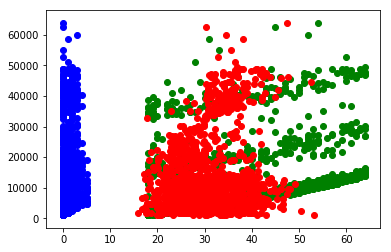

In [6]:
# สร้าง scatter plot เพื่อดูความสัมพันธ์ของข้อมูลทั้ง 4
plt.scatter(data['age'], data['charges'], color='green')
plt.scatter(data['bmi'], data['charges'], color='red')
plt.scatter(data['children'], data['charges'], color='blue')

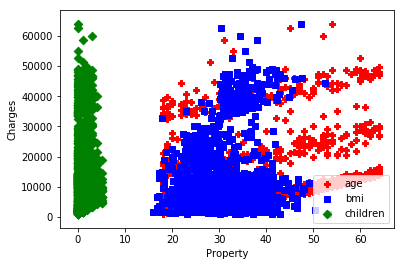

In [8]:
#ใช้คำสั่ง scatter plot เพื่อดูความสัมพันธ์ทั้ง 4 ตัวแปร

# 'age', 'bmi', 'children', 'charges'
# plt.scatter(x=advert['col'],y=advert['sales'],c='r',marker='P',label='label_col')
plt.scatter(x=data['age'],y=data['charges'],c='r',marker='P',label='age')
plt.scatter(x=data['bmi'],y=data['charges'],c='b',marker='s',label='bmi')
plt.scatter(x=data['children'],y=data['charges'],c='g',marker='D',label='children')

#plt.legend(numpoints=1,loc=4)
plt.legend(loc=4)
plt.xlabel('Property')
plt.ylabel('Charges')
plt.show()

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010



## Questions
1. ความสัมพันธ์ระหว่างค่ารักษาพยาบาลและคุณสมบัติต่างๆสามารถวิเคราะห์ได้อย่างไร? สามารถคาดการณ์ผลกระทบของแต่ละคุณสมบัติที่มีผลต่อมูลค่าค่ารักษาพยาบาลได้หรือไม่? ความสัมพันธ์เป็นเส้นตรงหรือไม่
+  คุณสมบัติใด (age, bmi, children,) ที่ทำให้ค่าใช้จ่ายมากที่สุด
+  ตัวแปรแต่ละตัวมีความสัมพันธ์กันหรือไม่


In [9]:
#Ordinary Least Squares: OLS เป็นการประมาณค่าด้วยวิธีกําลังสองน้อยที่สุดทําให้ผลรวมกําลังสองของค่า error น้อยที่สุด
# 'age', 'charges'
data_age_ols = sm.ols(formula=" charges ~ age ", data=data).fit()
data_age_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           4.89e-29
Time:                        09:26:27   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3165.8850    937.149      3.378      0.001    1327.440    5004.330
age          257.7226     22.502     11.453      0.000     213.579     301.866
==============================================================================
Omnibus:                      399.600   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              864.239
Skew:                           1.733   Prob(JB):                    2.15e-188
Kurtosis:                       4.869   Cond. No.                         124.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

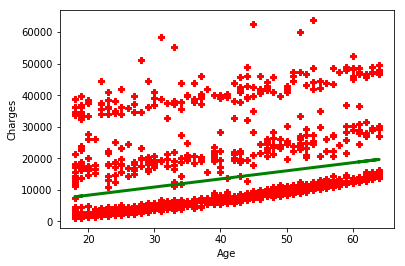

In [12]:
# ใช้ scatter plot เพื่อดูความสัมพันธ์ของตัวแปร และแสดงเส้นพยากรณ์ของความสัมพันธ์ของ 2 ตัวแปร
# 'age', 'charges'
plt.scatter(x=data['age'],y=data['charges'],c='r',marker='P',label='age')

plt.plot(data['age'],data_age_ols.predict(),c='g',linewidth=3)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

## ต้องการวิเคราะห์ว่าตัวแปรอื่นๆ มีผลต่อมูลค่ายอดขายสินค้าหรือไม่
ใช้ linear regression วิเคราะห์ค่าใช้จ่ายในการโฆษณาทางวิทยุและหนังสือพิมพ์มีผลต่อมูลค่ายอดขายสินค้าหรือไม่ โดยใช้ statsmodels

In [14]:
#  'bmi', 'charges'
# ปรับ model regression เพื่อให้ค่า error น้อยที่สุด
bmi_fit_model = sm.ols(formula=" charges ~ bmi ", data=data).fit()
bmi_fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     54.71
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           2.46e-13
Time:                        09:28:47   Log-Likelihood:                -14451.
No. Observations:                1338   AIC:                         2.891e+04
Df Residuals:                    1336   BIC:                         2.892e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1192.9372   1664.802      0.717      0.474   -2072.974    4458.849
bmi          393.8730     53.251      7.397      0.000     289.409     498.337
==============================================================================
Omnibus:                      261.030   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              431.091
Skew:                           1.297   Prob(JB):                     2.45e-94
Kurtosis:                       4.004   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

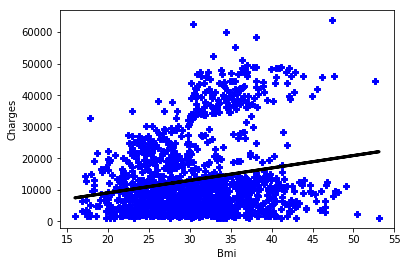

In [16]:
# ใช้ scatter plot เพื่อดูความสัมพันธ์ของตัวแปร และแสดงเส้นพยากรณ์ของความสัมพันธ์ของ 2 ตัวแปร
# 'bmi', 'charges'
plt.scatter(x=data['bmi'],y=data['charges'],c='b',marker='P',label='bmi')

plt.plot(data['bmi'],bmi_fit_model.predict(),c='black',linewidth=3)


plt.xlabel('Bmi')
plt.ylabel('Charges')
plt.show()

In [18]:
#'children', 'charges'
# ปรับ model regression เพื่อให้ค่า error น้อยที่สุด
children_fit_model = sm.ols(formula=" charges ~ children ", data=data).fit()

children_fit_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     6.206
Date:                Wed, 28 Feb 2024   Prob (F-statistic):             0.0129
Time:                        09:31:43   Log-Likelihood:                -14475.
No. Observations:                1338   AIC:                         2.895e+04
Df Residuals:                    1336   BIC:                         2.896e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.252e+04    446.450     28.049      0.000    1.16e+04    1.34e+04
children     683.0894    274.202      2.491      0.013     145.176    1221.002
==============================================================================
Omnibus:                      341.103   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              666.755
Skew:                           1.528   Prob(JB):                    1.64e-145
Kurtosis:                       4.619   Cond. No.                         2.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

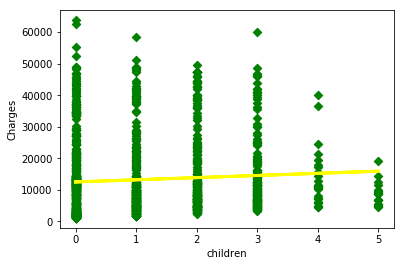

In [20]:
# ใช้ scatter plot เพื่อดูความสัมพันธ์ของตัวแปร และแสดงเส้นพยากรณ์ของความสัมพันธ์ของ 2 ตัวแปร
# 'children', 'charges'
plt.scatter(x=data['children'],y=data['charges'],c='g',marker='D',label='children')

plt.plot(data['children'],children_fit_model.predict(),c='yellow',linewidth=3)

plt.xlabel('children')
plt.ylabel('Charges')
plt.show()

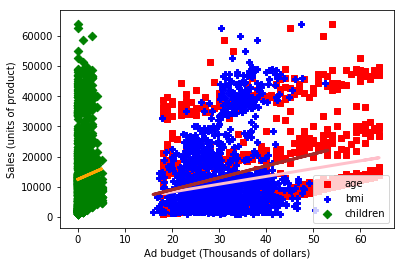

In [27]:
#ใช้ scatter plot เพื่อดูความสัมพันธ์ของตัวแปร'age', 'bmi', 'children', 'charges'และแสดงเส้นพยากรณ์ของความสัมพันธ์ของ 4 ตัวแปร

plt.scatter(x=data['age'],y=data['charges'],c='r',marker='s',label='age')
plt.scatter(x=data['bmi'],y=data['charges'],c='b',marker='P',label='bmi')
plt.scatter(x=data['children'],y=data['charges'],c='g',marker='D',label='children')
#
#
plt.legend(numpoints=1,loc=4)

plt.plot(data['age'],data_age_ols.predict(),c='pink',linewidth=3)
plt.plot(data['bmi'],bmi_fit_model.predict(),c='brown',linewidth=3)
plt.plot(data['children'],children_fit_model.predict(),c='orange',linewidth=3)
#
#

plt.xlabel('Ad budget (Thousands of dollars)')
plt.ylabel('Sales (units of product)')
plt.show()


## Multiple Linear Regression (แทนค่าจาก dataset ที่ใช้)

**Model:**
$$
charges = -6916.2433 + 239.9945 * age + 332.0834*bmi + 542.8647	*children.
$$


In [28]:
# 'age', 'bmi', 'children', 'charges'
#
ad_all_ols = sm.ols(formula="charges ~ age + bmi + children", data=data).fit()
#ad_all_ols = sm.ols(formula="sales ~ TV + newspaper", data=advert).fit()
ad_all_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           8.80e-37
Time:                        09:37:12   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6916.2433   1757.480     -3.935      0.000   -1.04e+04   -3468.518
age          239.9945     22.289     10.767      0.000     196.269     283.720
bmi          332.0834     51.310      6.472      0.000     231.425     432.741
children     542.8647    258.241      2.102      0.036      36.261    1049.468
==============================================================================
Omnibus:                      325.395   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              603.372
Skew:                           1.520   Prob(JB):                    9.54e-132
Kurtosis:                       4.255   Cond. No.                         290.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


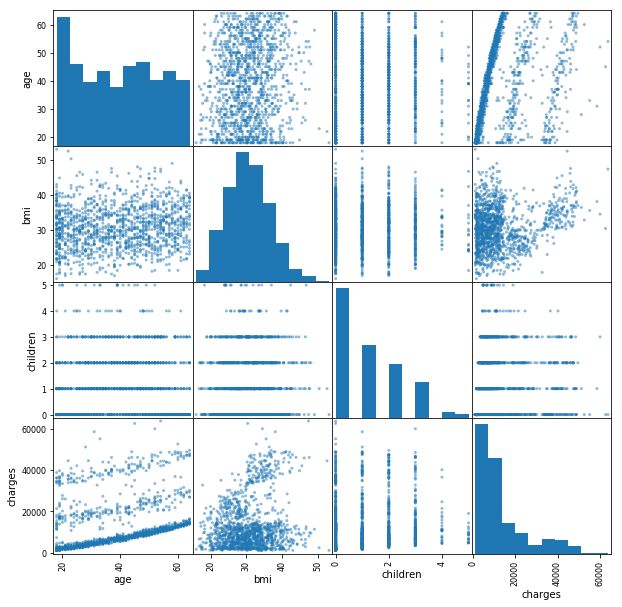

In [29]:
# plot ดูค่าสัมประสิทธิ์สหสัมพันธ์ (r) ของตัวแปร(use corr())
print(data.corr())
#pd.plotting.scatter_matrix(advert, figsize=(10, 10), diagonal='kde')
pd.plotting.scatter_matrix(data, figsize=(10, 10), diagonal='hist')
plt.show()


In [30]:
# 'bmi', 'children', 'charges'
# sm.ols(formula="", data=advert).fit()
#
ad_TR_ols = sm.ols(formula="charges ~ bmi + children", data=data).fit()
ad_TR_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     30.45
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           1.17e-13
Time:                        09:38:12   Log-Likelihood:                -14448.
No. Observations:                1338   AIC:                         2.890e+04
Df Residuals:                    1335   BIC:                         2.892e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    523.5995   1684.084      0.311      0.756   -2780.139    3827.338
bmi          392.2140     53.156      7.379      0.000     287.936     496.492
children     657.7747    268.899      2.446      0.015     130.265    1185.285
==============================================================================
Omnibus:                      265.478   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.183
Skew:                           1.311   Prob(JB):                     9.58e-97
Kurtosis:                       4.028   Cond. No.                         163.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# 'age','children', 'charges'
#
ad_TR_ols = sm.ols(formula="charges ~ age + children", data=data).fit()
ad_TR_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     68.01
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           7.45e-29
Time:                        09:38:50   Log-Likelihood:                -14413.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1335   BIC:                         2.885e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2636.0417    968.630      2.721      0.007     735.839    4536.244
age          255.6947     22.493     11.368      0.000     211.569     299.821
children     556.5271    262.157      2.123      0.034      42.242    1070.812
==============================================================================
Omnibus:                      403.007   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              878.228
Skew:                           1.742   Prob(JB):                    1.97e-191
Kurtosis:                       4.901   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# 'age', 'bmi', 'children', 'charges'
ad_TR_ols = sm.ols(formula="charges ~ age + bmi + children", data=data).fit()
ad_TR_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           8.80e-37
Time:                        09:39:06   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6916.2433   1757.480     -3.935      0.000   -1.04e+04   -3468.518
age          239.9945     22.289     10.767      0.000     196.269     283.720
bmi          332.0834     51.310      6.472      0.000     231.425     432.741
children     542.8647    258.241      2.102      0.036      36.261    1049.468
==============================================================================
Omnibus:                      325.395   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              603.372
Skew:                           1.520   Prob(JB):                    9.54e-132
Kurtosis:                       4.255   Cond. No.                         290.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#สรุป ข้อมูลทั้งหมด(age,bmi,children) มีผลขึ้นตรงกับ charge โดยสังเกตุได้จาก data.corr() ที่มี age มีผลมากที่สุด
#และ R-squared ที่มีค่าเปลี่ยนแปลงไปเมื่อตัดตัวใดตัวนึงออก
#(แต่หากตัด age ออกจะเหลือ 4% ตัด bmi ออกจะเหลือ 9% แต่ถ้าตัด children ออกจะเหลือ 11%)แต่หากคิดจากทั้งหมดค่าความถูกต้องจะมีเพียงแค่ 12% เท่านั้น
#แต่หากคิดจากทั้งหมดค่าความถูกต้องจะมีเพียงแค่ 12% เท่านั้น 12 -11.7 = 0.3%
#////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [34]:
ad_TR_ols = sm.ols(formula="charges ~ age + bmi", data=data).fit()
ad_TR_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     88.60
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           7.39e-37
Time:                        09:46:00   Log-Likelihood:                -14394.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1335   BIC:                         2.881e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6424.8046   1744.091     -3.684      0.000   -9846.262   -3003.347
age          241.9308     22.298     10.850      0.000     198.187     285.674
bmi          332.9651     51.374      6.481      0.000     232.182     433.748
==============================================================================
Omnibus:                      321.874   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              592.574
Skew:                           1.511   Prob(JB):                    2.11e-129
Kurtosis:                       4.223   Cond. No.                         287.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""